<h1>Datenexploration</h1>

<h3>Korpora: Harry Potter Original vs. Harry Potter Fanfiction</h3>

In [55]:
import pandas as pd
import numpy as np
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

<h4>Originalbücher (Deutsch)</h4>

In [2]:
hp_o = pd.read_csv('data/df_original.csv')
hp_o

,Unnamed: 0,Autor,Titel,Übersetzer,Original_Titel,ISBN,Datum,Text,removed_stop_word_lower,removed_stop_word,number_of_tokens,number_of_types,clean_text,network_text
0,0,J.K. Rowling,HARRY POTTER und der Gefangene von Askaban,Klaus Fritz,Harry Potter and the Prisoner of Azkaban,978-1-78110-057-8,1999,"\n\n\nFür Jill Prewett und Aine Kiely,\n\ndie ...","\n\n\nfür jill prewett und aine kiely,\n\ndie ...","jill prewett aine kiely, patinnen souls inhalt...",115980.0,19479.0,jill prewett aine kiely patinnen souls inhalt ...,für jill prewett und aine kiely die patinne...
1,1,J.K. Rowling,HARRY POTTER und der Halbblutprinz,Klaus Fritz,Harry Potter and the Half-Blood Prince,978-1-78110-060-8,2005,"\n\n\nMackenzie,\n\nmeiner schönen Tochter,\n\...","\n\n\nmackenzie,\n\nmeiner schönen tochter,\n\...","mackenzie, schönen tochter, widme zwilling tin...",179884.0,26838.0,mackenzie schönen tochter widme zwilling tinte...,mackenzie meiner schönen tochter widme ich...
2,2,J.K. Rowling,HARRY POTTER und der Orden des Phönix,Klaus Fritz,Harry Potter and the Order of the Phoenix,978-1-78110-059-2,2003,"\n\n\n\n\nFür Neil, Jessica und David,\n\ndie ...","\n\n\n\n\nfür neil, jessica und david,\n\ndie ...","neil, jessica david, welt verzaubern inhalt du...",268898.0,35356.0,neil jessica david welt verzaubern inhalt dudl...,für neil jessica und david die meine welt ...
3,3,J.K. Rowling,HARRY POTTER und der Stein der Weisen,Klaus Fritz,Harry Potter and the Philosopher’s Stone,978-1-78110-055-4,1997,"\n\n\n\nFür Jessica, für Anne und fü Di;\n\nJe...","\n\n\n\nfür jessica, für anne und fü di;\n\nje...","jessica, anne fü di; jessica mag geschichten, ...",84152.0,15910.0,jessica anne fü di jessica mag geschichten ann...,für jessica für anne und fü di jessica mag ...
4,4,J.K. Rowling,HARRY POTTER und die Heiligtümer des Todes,Klaus Fritz,Harry Potter and the Deathly Hallows,978-1-78110-061-5,2007,\n\n\nDie\n\nWidmung\n\ndieses Buches\n\nist\n...,\n\n\ndie\n\nwidmung\n\ndieses buches\n\nist\n...,"widmung buches siebengeteilt: neil, jessica, d...",207576.0,29725.0,widmung buches siebengeteilt neil jessica davi...,die widmung dieses buches ist siebengete...
5,5,J.K. Rowling,HARRY POTTER und die Kammer des Schreckens,Klaus Fritz,Harry Potter and the Chamber of Secrets,978-1-78110-056-1,1998,"\n\n\nFür Sean P. F. Harris,\n\nFluchtwagen-Fa...","\n\n\nfür sean p. f. harris,\n\nfluchtwagen-fa...","sean p. f. harris, fluchtwagen-fahrer freund s...",91968.0,17391.0,sean p f harris fluchtwagen fahrer freund stür...,für sean p f harris fluchtwagen fahrer und ...
6,6,J.K. Rowling,HARRY POTTER und der Feuerkelch,Klaus Fritz,Harry Potter and the Goblet of Fire,978-1-78110-058-5,2000,"Für Peter Rowling,\n\nin Erinnerung an Mr Ridl...","für peter rowling,\n\nin erinnerung an mr ridl...","peter rowling, erinnerung mr ridley, susan sla...",203341.0,29070.0,peter rowling erinnerung mr ridley susan sladd...,für peter rowling in erinnerung an mr ridley ...


<h4>Fanfiction (Deutsch)</h4>

In [3]:
hp_ff = pd.read_csv('data/df_fanfiction.csv')
hp_ff

,Unnamed: 0,Autor,Titel,Datum,Text
0,k00500000295,Child of Time,Artemis Fowl Neu Anfang,2016,"Irland, Fowl ManorIch sitze mit Artemis im W..."
1,k00500000306,berg-ulme,Die Atlantiskrise,2013,Die Atlantiskrise Titel: „Die Atlantiskrise...
2,k00500000525,Little Jewel,Die pure Hoelle,2012,"Mein Leben war die reinste Hölle, mein Vater..."
3,k00500000584,LLLL,M amp M,2011,Erstmal ein Vorwort:Hinter dem Account LLLL ...
4,k00500000602,Ichbinich,Neues Leben neue Liebe,2012,Endlich landete der Flieger und ich konnte a...
...,...,...,...,...,...
9806,k00500087323,Rauchschweif,Games of Death MMFF,2017,"Hi!Hier werden viele Leute sich denken: ""Oh ..."
9807,k00500088115,Korallenblatt,Pfad der Finsternis,2016,Hey! :)Jetzt musstet ihr doch nicht so lange...
9808,k00500088140,FlamingRose,Quiz,2017,Heute werde ich dieses Quiz offiziell als be...
9809,k00500088650,Nightwind,Unsichtbare Feinde,2013,Heeeeyy.... Also das ist meine erste FF. Sei...


In [4]:
# Anzahl der Tokens als Spalte hinzufügen 
hp_ff['number_of_tokens'] = hp_ff['Text'].str.count(r'\w+')
hp_ff

,Unnamed: 0,Autor,Titel,Datum,Text,number_of_tokens
0,k00500000295,Child of Time,Artemis Fowl Neu Anfang,2016,"Irland, Fowl ManorIch sitze mit Artemis im W...",3772
1,k00500000306,berg-ulme,Die Atlantiskrise,2013,Die Atlantiskrise Titel: „Die Atlantiskrise...,15957
2,k00500000525,Little Jewel,Die pure Hoelle,2012,"Mein Leben war die reinste Hölle, mein Vater...",59182
3,k00500000584,LLLL,M amp M,2011,Erstmal ein Vorwort:Hinter dem Account LLLL ...,42528
4,k00500000602,Ichbinich,Neues Leben neue Liebe,2012,Endlich landete der Flieger und ich konnte a...,16570
...,...,...,...,...,...,...
9806,k00500087323,Rauchschweif,Games of Death MMFF,2017,"Hi!Hier werden viele Leute sich denken: ""Oh ...",49585
9807,k00500088115,Korallenblatt,Pfad der Finsternis,2016,Hey! :)Jetzt musstet ihr doch nicht so lange...,129779
9808,k00500088140,FlamingRose,Quiz,2017,Heute werde ich dieses Quiz offiziell als be...,2183
9809,k00500088650,Nightwind,Unsichtbare Feinde,2013,Heeeeyy.... Also das ist meine erste FF. Sei...,97023


<h4>Anzahl der Tokens im Vergleich</h4>

In [5]:
tokens_o = hp_o['number_of_tokens'].sum()
tokens_ff = hp_ff['number_of_tokens'].sum()
print('Anzahl der Tokens Original: ', tokens_o)
print('Anzahl der Tokens Fanfiction: ', tokens_ff)

Anzahl der Tokens Original:  1151799.0
Anzahl der Tokens Fanfiction:  277106551


--> Die beiden Korpora sind extrem unausgeglichen, was die Tokenanzahl betrifft <br>
--> Fanfiction auf ähnliche Länge kürzen wie Originale

In [6]:
# x = hp_ff['number_of_tokens'][0:21].sum()         
# durch ausprobieren: x = 1004398 bei [0:22] 

hp_ff_short = hp_ff[:21] 
hp_ff_short.head()

# Speichern (die nächste Zeile nur ausführen, wenn das gekürzte Korpus gespeichert werden soll)
# hp_ff_short.to_csv('data/df_fanfiction_short.csv', index=False)

,Unnamed: 0,Autor,Titel,Datum,Text,number_of_tokens
0,k00500000295,Child of Time,Artemis Fowl Neu Anfang,2016,"Irland, Fowl ManorIch sitze mit Artemis im W...",3772
1,k00500000306,berg-ulme,Die Atlantiskrise,2013,Die Atlantiskrise Titel: „Die Atlantiskrise...,15957
2,k00500000525,Little Jewel,Die pure Hoelle,2012,"Mein Leben war die reinste Hölle, mein Vater...",59182
3,k00500000584,LLLL,M amp M,2011,Erstmal ein Vorwort:Hinter dem Account LLLL ...,42528
4,k00500000602,Ichbinich,Neues Leben neue Liebe,2012,Endlich landete der Flieger und ich konnte a...,16570


In [7]:
tokens_ff_short = hp_ff_short['number_of_tokens'].sum()
tokens_ff_short

1004398

<h3>Korpora: Harry Potter Original vs. Harry Potter Fanfiction (gekürzt)</h3>

<h4>Original (Deutsch)</h4>

In [8]:
# hp_o = pd.read_csv('data/df_original.csv')
hp_o.head()

,Unnamed: 0,Autor,Titel,Übersetzer,Original_Titel,ISBN,Datum,Text,removed_stop_word_lower,removed_stop_word,number_of_tokens,number_of_types,clean_text,network_text
0,0,J.K. Rowling,HARRY POTTER und der Gefangene von Askaban,Klaus Fritz,Harry Potter and the Prisoner of Azkaban,978-1-78110-057-8,1999,"\n\n\nFür Jill Prewett und Aine Kiely,\n\ndie ...","\n\n\nfür jill prewett und aine kiely,\n\ndie ...","jill prewett aine kiely, patinnen souls inhalt...",115980.0,19479.0,jill prewett aine kiely patinnen souls inhalt ...,für jill prewett und aine kiely die patinne...
1,1,J.K. Rowling,HARRY POTTER und der Halbblutprinz,Klaus Fritz,Harry Potter and the Half-Blood Prince,978-1-78110-060-8,2005,"\n\n\nMackenzie,\n\nmeiner schönen Tochter,\n\...","\n\n\nmackenzie,\n\nmeiner schönen tochter,\n\...","mackenzie, schönen tochter, widme zwilling tin...",179884.0,26838.0,mackenzie schönen tochter widme zwilling tinte...,mackenzie meiner schönen tochter widme ich...
2,2,J.K. Rowling,HARRY POTTER und der Orden des Phönix,Klaus Fritz,Harry Potter and the Order of the Phoenix,978-1-78110-059-2,2003,"\n\n\n\n\nFür Neil, Jessica und David,\n\ndie ...","\n\n\n\n\nfür neil, jessica und david,\n\ndie ...","neil, jessica david, welt verzaubern inhalt du...",268898.0,35356.0,neil jessica david welt verzaubern inhalt dudl...,für neil jessica und david die meine welt ...
3,3,J.K. Rowling,HARRY POTTER und der Stein der Weisen,Klaus Fritz,Harry Potter and the Philosopher’s Stone,978-1-78110-055-4,1997,"\n\n\n\nFür Jessica, für Anne und fü Di;\n\nJe...","\n\n\n\nfür jessica, für anne und fü di;\n\nje...","jessica, anne fü di; jessica mag geschichten, ...",84152.0,15910.0,jessica anne fü di jessica mag geschichten ann...,für jessica für anne und fü di jessica mag ...
4,4,J.K. Rowling,HARRY POTTER und die Heiligtümer des Todes,Klaus Fritz,Harry Potter and the Deathly Hallows,978-1-78110-061-5,2007,\n\n\nDie\n\nWidmung\n\ndieses Buches\n\nist\n...,\n\n\ndie\n\nwidmung\n\ndieses buches\n\nist\n...,"widmung buches siebengeteilt: neil, jessica, d...",207576.0,29725.0,widmung buches siebengeteilt neil jessica davi...,die widmung dieses buches ist siebengete...


--> Reihenfolge der Bücher alphabetisch <br>
--> lieber chronologisch ordnen

In [9]:
hp_o = hp_o.sort_values(by=['Datum'], ascending = True)
hp_o.head()

,Unnamed: 0,Autor,Titel,Übersetzer,Original_Titel,ISBN,Datum,Text,removed_stop_word_lower,removed_stop_word,number_of_tokens,number_of_types,clean_text,network_text
3,3,J.K. Rowling,HARRY POTTER und der Stein der Weisen,Klaus Fritz,Harry Potter and the Philosopher’s Stone,978-1-78110-055-4,1997,"\n\n\n\nFür Jessica, für Anne und fü Di;\n\nJe...","\n\n\n\nfür jessica, für anne und fü di;\n\nje...","jessica, anne fü di; jessica mag geschichten, ...",84152.0,15910.0,jessica anne fü di jessica mag geschichten ann...,für jessica für anne und fü di jessica mag ...
5,5,J.K. Rowling,HARRY POTTER und die Kammer des Schreckens,Klaus Fritz,Harry Potter and the Chamber of Secrets,978-1-78110-056-1,1998,"\n\n\nFür Sean P. F. Harris,\n\nFluchtwagen-Fa...","\n\n\nfür sean p. f. harris,\n\nfluchtwagen-fa...","sean p. f. harris, fluchtwagen-fahrer freund s...",91968.0,17391.0,sean p f harris fluchtwagen fahrer freund stür...,für sean p f harris fluchtwagen fahrer und ...
0,0,J.K. Rowling,HARRY POTTER und der Gefangene von Askaban,Klaus Fritz,Harry Potter and the Prisoner of Azkaban,978-1-78110-057-8,1999,"\n\n\nFür Jill Prewett und Aine Kiely,\n\ndie ...","\n\n\nfür jill prewett und aine kiely,\n\ndie ...","jill prewett aine kiely, patinnen souls inhalt...",115980.0,19479.0,jill prewett aine kiely patinnen souls inhalt ...,für jill prewett und aine kiely die patinne...
6,6,J.K. Rowling,HARRY POTTER und der Feuerkelch,Klaus Fritz,Harry Potter and the Goblet of Fire,978-1-78110-058-5,2000,"Für Peter Rowling,\n\nin Erinnerung an Mr Ridl...","für peter rowling,\n\nin erinnerung an mr ridl...","peter rowling, erinnerung mr ridley, susan sla...",203341.0,29070.0,peter rowling erinnerung mr ridley susan sladd...,für peter rowling in erinnerung an mr ridley ...
2,2,J.K. Rowling,HARRY POTTER und der Orden des Phönix,Klaus Fritz,Harry Potter and the Order of the Phoenix,978-1-78110-059-2,2003,"\n\n\n\n\nFür Neil, Jessica und David,\n\ndie ...","\n\n\n\n\nfür neil, jessica und david,\n\ndie ...","neil, jessica david, welt verzaubern inhalt du...",268898.0,35356.0,neil jessica david welt verzaubern inhalt dudl...,für neil jessica und david die meine welt ...


<h4>Fanfiction gekürzt (Deutsch)</h4>

In [10]:
hp_ff = pd.read_csv('data/df_fanfiction_short.csv')
hp_ff.head()

,Unnamed: 0,Autor,Titel,Datum,Text,number_of_tokens
0,k00500000295,Child of Time,Artemis Fowl Neu Anfang,2016,"Irland, Fowl ManorIch sitze mit Artemis im W...",3772
1,k00500000306,berg-ulme,Die Atlantiskrise,2013,Die Atlantiskrise Titel: „Die Atlantiskrise...,15957
2,k00500000525,Little Jewel,Die pure Hoelle,2012,"Mein Leben war die reinste Hölle, mein Vater...",59182
3,k00500000584,LLLL,M amp M,2011,Erstmal ein Vorwort:Hinter dem Account LLLL ...,42528
4,k00500000602,Ichbinich,Neues Leben neue Liebe,2012,Endlich landete der Flieger und ich konnte a...,16570


<h4>Anzahl der Tokens im Vergleich</h4>

In [11]:
tokens_o = hp_o['number_of_tokens'].sum()
tokens_ff = hp_ff['number_of_tokens'].sum()
print('Anzahl der Tokens Original: ', tokens_o)
print('Anzahl der Tokens Fanfiction: ', tokens_ff)

Anzahl der Tokens Original:  1151799.0
Anzahl der Tokens Fanfiction:  1004398


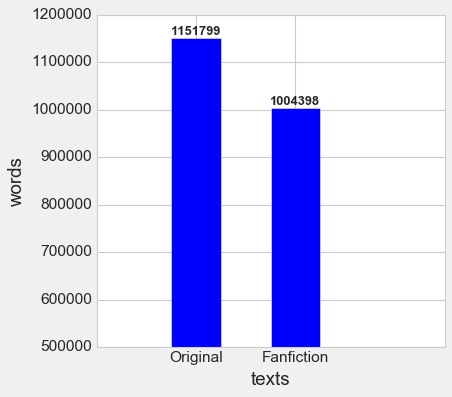

In [14]:
plt.figure(figsize=[5, 5])
plt.style.use('seaborn-whitegrid') 

texts = ('Original', 'Fanfiction')
words = (1151799, 1004398)
index = np.arange(len(texts))

plt.axis([-1, 2.5, 500000, 1200000])
plt.ylabel('words')
plt.xlabel('texts')
plt.bar(index, words, width=0.5,  color="b")
plt.xticks(index, texts)  

for i, j in zip(index, words):
       plt.annotate(j, xy=(i,j), xycoords="data", verticalalignment="bottom", 
                    horizontalalignment="center", fontweight="demi", 
                    fontsize="small")
plt.show()

<h5>Original</h5>

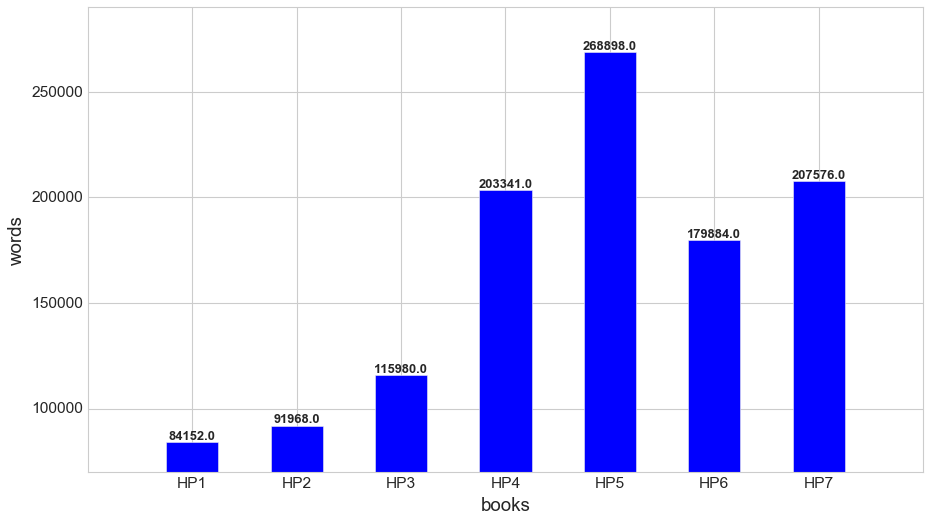

In [15]:
plt.figure(figsize=[12, 7])
plt.style.use('seaborn-whitegrid') 

books = ('HP1', 'HP2', 'HP3', 'HP4', 'HP5', 'HP6', 'HP7')
words = hp_o['number_of_tokens']
index = np.arange(len(books))

plt.axis([-1, 7, 70000, 290000])
plt.ylabel('words')
plt.xlabel('books')
plt.bar(index, words, width=0.5,  color="b")
plt.xticks(index, books)  

for i, j in zip(index, words):
       plt.annotate(j, xy=(i,j), xycoords="data", verticalalignment="bottom", 
                    horizontalalignment="center", fontweight="demi", 
                    fontsize="small")
plt.show()

<h5>Fanfiction (gekürzt)</h5>

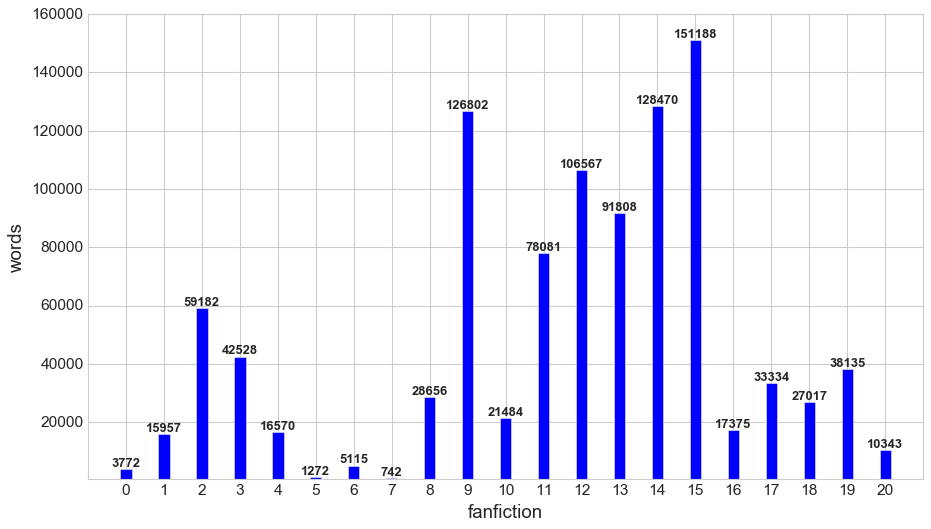

In [16]:
plt.figure(figsize=[12, 7])
plt.style.use('seaborn-whitegrid') 

words = hp_ff['number_of_tokens']
index = hp_ff.index 

plt.axis([-1, 21, 500, 160000])
plt.ylabel('words')
plt.xlabel('fanfiction')
plt.bar(index, words, width=0.3,  color="b")
plt.xticks(index)  

for i, j in zip(index, words):
       plt.annotate(j, xy=(i,j), xycoords="data", verticalalignment="bottom", 
                    horizontalalignment="center", fontweight="demi", 
                    fontsize="small")
plt.show()

<h1>Vektorsemantik</h1>

<h3>Kookurrenzmatrix</h3>

In [17]:
# Quelle: https://stackoverflow.com/questions/35562789/how-do-i-calculate-a-word-word-co-occurrence-matrix-with-sklearn

def co_occurance_matrix(input_text, top_words, window_size):
    
    co_occur = pd.DataFrame(index = top_words, columns = top_words)

    for row,nrow in zip(top_words, range(len(top_words))):
        
        for colm,ncolm in zip(top_words, range(len(top_words))):        
            count = 0
            
            if row == colm: 
                co_occur.iloc[nrow,ncolm] = count
                
            else: 
                
                for single_essay in input_text:    
                    
                    essay_split = single_essay.split(' ')
                    max_len = len(essay_split)
                    top_word_index = [index for index, split in enumerate(essay_split) if row in split]
                    
                    for index in top_word_index:
                        
                        if index == 0:
                            count = count + essay_split[:window_size + 1].count(colm)
                            
                        elif index == (max_len - 1): 
                            count = count + essay_split[-(window_size + 1):].count(colm)
                            
                        else:
                            count = count + essay_split[index + 1 : (index + window_size + 1)].count(colm)
                            
                            if index < window_size: 
                                count = count + essay_split[: index].count(colm)
                                
                            else:
                                count = count + essay_split[(index - window_size): index].count(colm)
                                
                co_occur.iloc[nrow,ncolm] = count

    return co_occur

In [18]:
hp1 = hp_o.drop([0, 1, 2, 4, 5, 6]) # nur der erste Harry Potter 

corpus = hp1.Text
words = ['Harry', 'Ron', 'Hermine', 'Hagrid', 'Dumbledore', 'Malfoy']
window_size = 2 # window_size: die Größe des Kontext-Fensters 

cooccm_hp1 = co_occurance_matrix(corpus, words, window_size)
cooccm_hp1

,Harry,Ron,Hermine,Hagrid,Dumbledore,Malfoy
Harry,0,67,27,13,3,4
Ron,54,0,38,5,1,2
Hermine,17,34,0,1,0,0
Hagrid,24,2,5,0,4,1
Dumbledore,8,1,0,3,0,0
Malfoy,4,2,0,0,0,0


In [19]:
corpus = hp_o.Text

cooccm_hp_o = co_occurance_matrix(corpus, words, window_size)
cooccm_hp_o

,Harry,Ron,Hermine,Hagrid,Dumbledore,Malfoy
Harry,0,786,353,52,139,37
Ron,474,0,777,14,14,11
Hermine,280,774,0,12,6,4
Hagrid,76,13,26,0,16,5
Dumbledore,130,10,12,8,0,5
Malfoy,41,14,10,2,5,0


<h3>Cosinus-Abstand</h3>

<h4>Cosinus-Abstand zwischen den einzelnen Harry Potter Büchern</h4>

In [45]:
# Cosinus-Abstand zwischen Harry Potter 1 und 7

text1 = hp_o.Text[3]  # HP 1
text2 = hp_o.Text[4]  # HP 7

vectorizer = TfidfVectorizer(text1, text2)
vectors = vectorizer.fit_transform([text1, text2]).toarray()

cosine = cosine_similarity(vectors)
cosine

array([[1.        , 0.98657893],
       [0.98657893, 1.        ]])

<h4>Cosinus-Abstand zwischen den Originaltexten und der Fanfiction</h4>

In [54]:
text1 = hp_o.Text   # HP Original
text2 = hp_ff.Text   # HP Fanfiction

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(text1, text2).toarray()

cosine = cosine_similarity(vectors)
cosine

# das kann iwie nicht sein... 

array([[1.        , 0.98692838, 0.9860364 , 0.98726915, 0.98544256,
        0.98214612, 0.98560501],
       [0.98692838, 1.        , 0.98837639, 0.98822707, 0.98614287,
        0.980322  , 0.98231187],
       [0.9860364 , 0.98837639, 1.        , 0.98785377, 0.98783732,
        0.97984946, 0.98242187],
       [0.98726915, 0.98822707, 0.98785377, 1.        , 0.98969875,
        0.98205952, 0.98573317],
       [0.98544256, 0.98614287, 0.98783732, 0.98969875, 1.        ,
        0.98869084, 0.98948507],
       [0.98214612, 0.980322  , 0.97984946, 0.98205952, 0.98869084,
        1.        , 0.9884043 ],
       [0.98560501, 0.98231187, 0.98242187, 0.98573317, 0.98948507,
        0.9884043 , 1.        ]])